In [51]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

In [52]:

data = pd.read_csv("D:/FreeLance work/dataset_1.csv")

In [53]:

threshold = 0.2
missing_percentage = data.isnull().sum() / len(data)
filtered_data = data.loc[:, missing_percentage <= threshold]

In [54]:

categorical_cols = filtered_data.select_dtypes(include=['object']).columns
numerical_cols = filtered_data.select_dtypes(exclude=['object']).columns

In [55]:

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    filtered_data[col] = le.fit_transform(filtered_data[col].astype(str))
    label_encoders[col] = le

imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data_numerical = pd.DataFrame(imputer.fit_transform(filtered_data[numerical_cols]), columns=numerical_cols)

imputed_data = pd.concat([imputed_data_numerical, filtered_data[categorical_cols]], axis=1)


In [56]:

X = imputed_data.drop('AKI', axis=1)  #
y = imputed_data['AKI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:

gb_model_tuned = GradientBoostingClassifier(
    n_estimators=50,      
    learning_rate=0.1,    
    max_depth=2,          
    min_samples_leaf=10,  
    random_state=42
)

In [59]:

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [60]:
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1]
y_pred_gb = (y_pred_prob_gb > 0.5).astype(int)

In [61]:

auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
print(f"Gradient Boosting AUC Score: {auc_gb}")
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting AUC Score: 0.9041769041769042
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.33      0.46        33
         1.0       0.89      0.98      0.93       185

    accuracy                           0.88       218
   macro avg       0.81      0.66      0.70       218
weighted avg       0.87      0.88      0.86       218

Gradient Boosting Confusion Matrix:
[[ 11  22]
 [  4 181]]


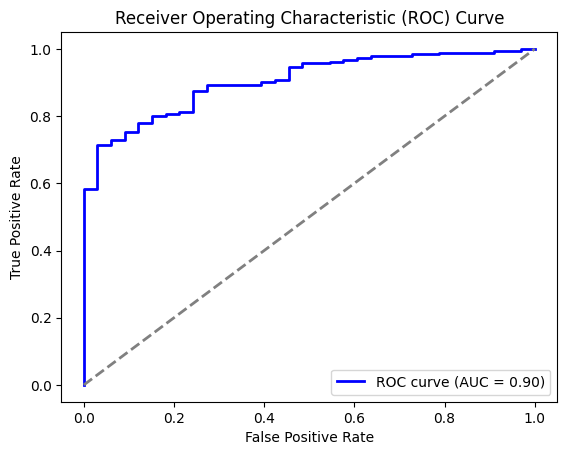

In [62]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()